# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/2-PROJECTS/1MODULE - final/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print("Rows:" ,df.shape[0])
print("Columns: ", df.shape[1])

print("Size:" ,df.size)

Rows: 1898
Columns:  9
Size: 17082


#### Observations:

The DataFrame has 1898 rows, 9 columns and a size of 17082.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
#changing the customer_id to string so it is not treated as a continuous variable
df["customer_id"]= df["customer_id"].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 133.6+ KB


#### Observations:
the Data Frame has 9 columns of which 4 are integers, 1 is a float and 4are objects. The DataSet, as far as we can tell from this table, not missing any information.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
print("The number of duplicates in the data set is:",df.duplicated().sum())
print("The number of duplicate orders in the data set is:",df.duplicated("order_id").sum())

The number of duplicates in the data set is: 0
The number of duplicate orders in the data set is: 0


In [ ]:
print("Unique number of customers:",df['customer_id'].nunique())
print("Unique number of restaurants:",df['restaurant_name'].nunique())
print("Number of cuisine types:",df['cuisine_type'].nunique())

Unique number of customers: 1200
Unique number of restaurants: 178
Number of cuisine types: 14


#### Observations:
The DataFrame doesnt have any missing data, the data set alaso does not have any NaN or duplicates.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,16.498851,27.371970,24.161749
std,5.480497e+02,7.483812,4.632481,4.972637
min,1.476547e+06,4.470000,20.000000,15.000000
25%,1.477021e+06,12.080000,23.000000,20.000000
50%,1.477496e+06,14.140000,27.000000,25.000000
75%,1.477970e+06,22.297500,31.000000,28.000000
max,1.478444e+06,35.410000,35.000000,33.000000


In [ ]:
df.describe(exclude = 'number').T

,count,unique,top,freq
customer_id,1898,1200,52832,13
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:



*   The **minimum** time it takes for food to be prepared once an order is placed is **20 minutes**.
*   The **average** time it takes for food to be prepared once an order is placed is **27.37 minutes**.
*   The **maximum** time it takes for food to be prepared once an order is placed is **35 minutes**.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here

rating_count  = df["rating"].value_counts()
print(rating_count)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


In [ ]:
print(rating_count/df.shape[0])

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64


#### Observations:
The orders not rated by custmers are 736, this accounts for 38.78% of all orders.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

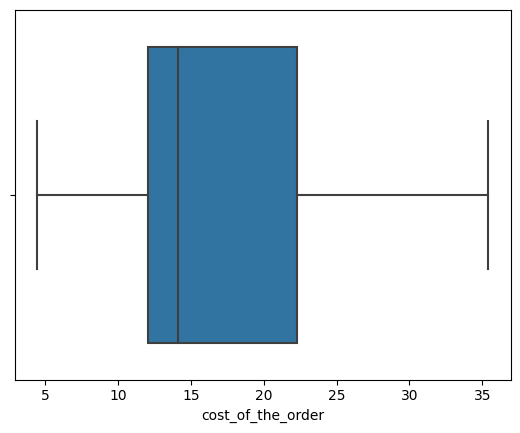

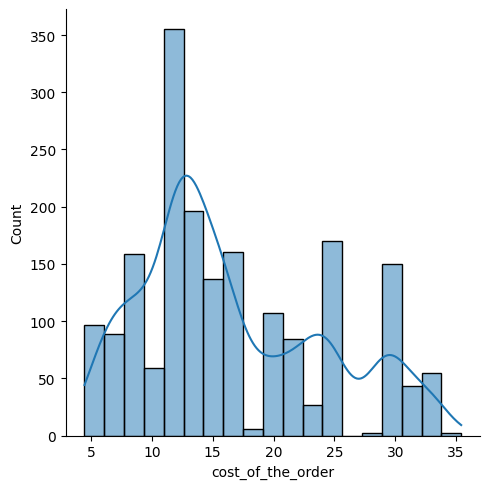

In [ ]:
# Write the code here
sns.boxplot(data=df,x="cost_of_the_order")
plt.show()
sns.displot(df,x="cost_of_the_order",kde=True)

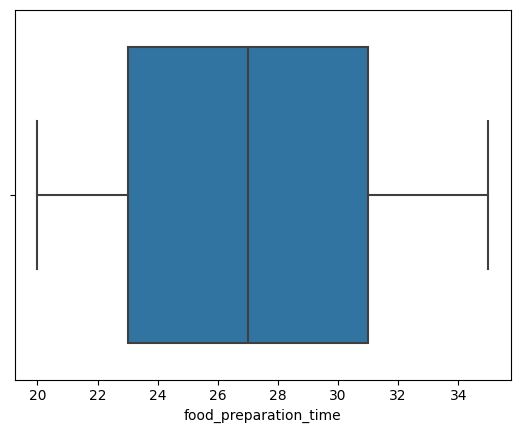

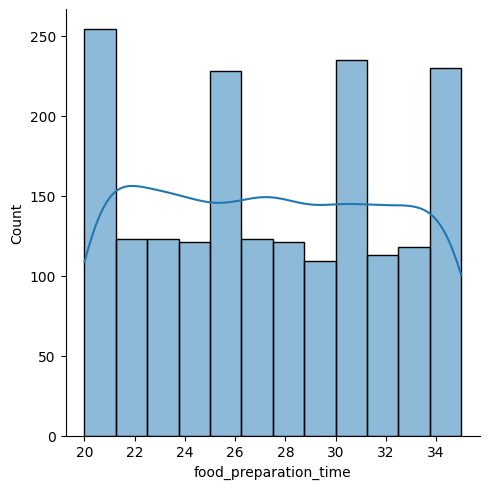

In [ ]:
sns.boxplot(data=df,x="food_preparation_time")
plt.show()
sns.displot(df,x="food_preparation_time",kde=True)


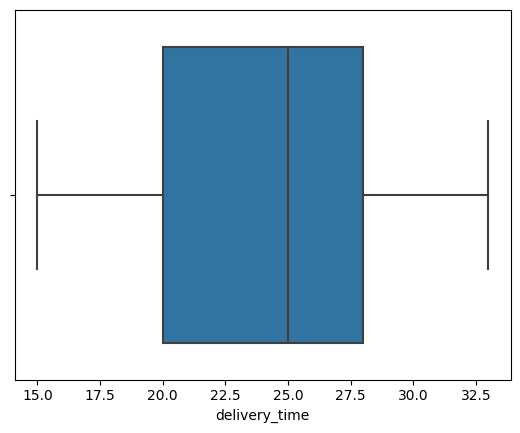

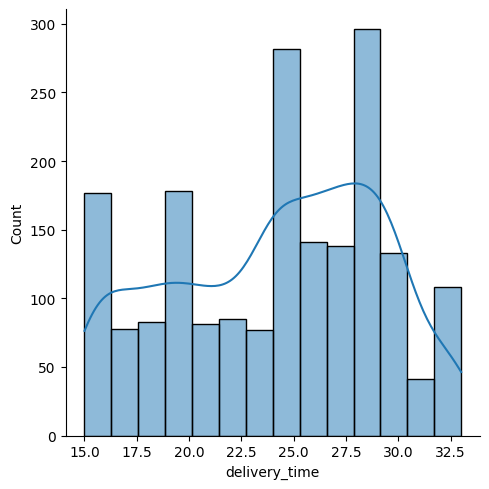

In [ ]:
sns.boxplot(data=df,x="delivery_time")
plt.show()
sns.displot(df,x="delivery_time",kde=True)

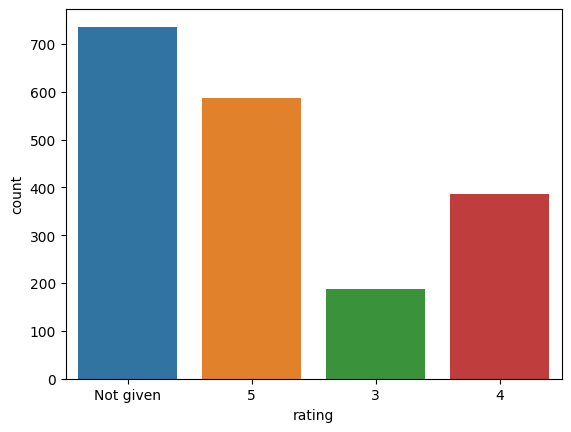

In [ ]:
sns.countplot(df,x='rating')
plt.show()

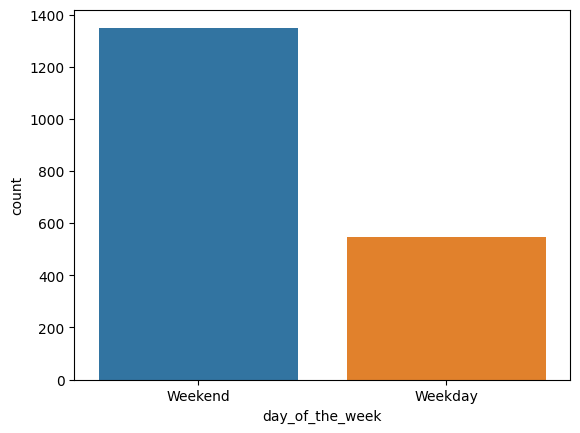

In [ ]:
sns.countplot(df,x='day_of_the_week')
plt.show()

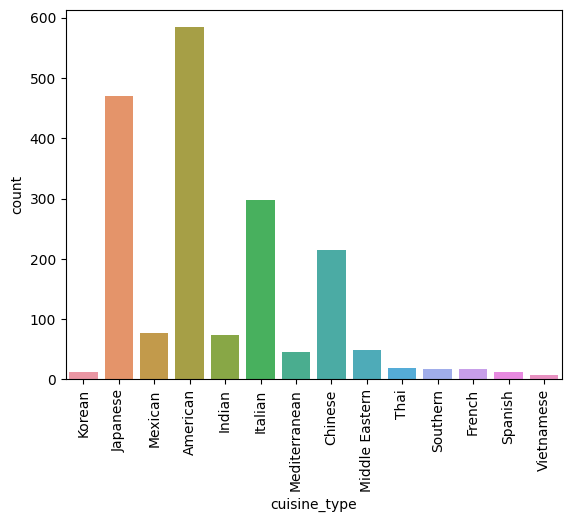

In [ ]:
sns.countplot(df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df["restaurant_name"].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
df.loc[df["restaurant_name"]=="Parm"].count()

order_id                 68
customer_id              68
restaurant_name          68
cuisine_type             68
cost_of_the_order        68
day_of_the_week          68
rating                   68
food_preparation_time    68
delivery_time            68
dtype: int64

#### Observations:
The top 5 restaurants in terms of the number of orders received are:

*   **Shake Shack** with **219 orders**
*   **The Meatball Shop** with **132 orders**
*   **Blue Ribbon Sushi** with **119 orders**
*   **Blue Ribbon Fried Chicken** with **96 orders**
*   **Parm** with **68 orders**


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
weekend_df = df[df["day_of_the_week"]=="Weekend"]
weekend_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22


In [ ]:
weekend_df["cuisine_type"].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

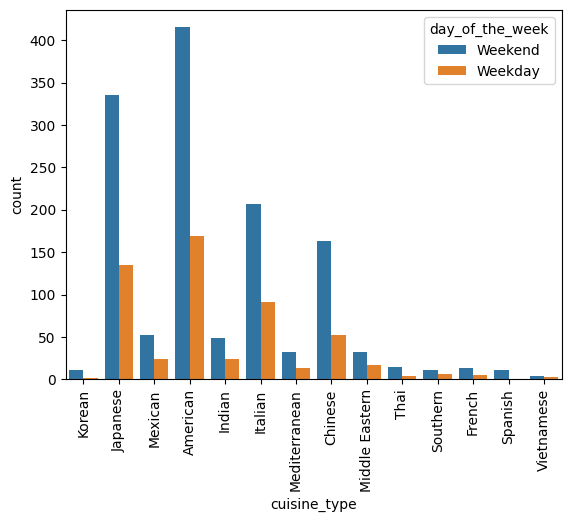

In [ ]:
# Write the code here
sns.countplot(df,x='cuisine_type', hue="day_of_the_week")
plt.xticks(rotation=90)
plt.show()

#### Observations:
The most popular cuisine on weekends is **American** with **415** orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
(df[df["cost_of_the_order"]>20].count())/(df["cost_of_the_order"].count())

order_id                 0.292413
customer_id              0.292413
restaurant_name          0.292413
cuisine_type             0.292413
cost_of_the_order        0.292413
day_of_the_week          0.292413
rating                   0.292413
food_preparation_time    0.292413
delivery_time            0.292413
dtype: float64

In [ ]:
print(df["cost_of_the_order"].max())
print(df["cost_of_the_order"].min())

35.41
4.47


In [ ]:
# Write the code here

df['cost_bins'] = pd.cut(df['cost_of_the_order'],bins=[0,20,40],labels=['Less than or equeal to 20 dollars','More than 20 dollars'])
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_bins
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,More than 20 dollars
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,Less than or equeal to 20 dollars
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Less than or equeal to 20 dollars
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,More than 20 dollars
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Less than or equeal to 20 dollars


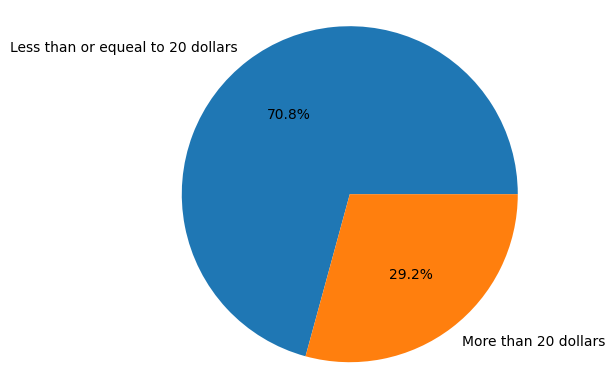

In [ ]:

cost_bins_pie = df['cost_bins'].value_counts()

plt.pie(cost_bins_pie, labels=cost_bins_pie.index, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.show()


#### Observations:
The percentage of the orders that **cost more than 20 dollars is 29.2%**


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df["delivery_time"].mean()

24.161749209694417

#### Observations:
The **mean** order delivery time is **24.16 minutes**.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df["customer_id"].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
The 20% discount vouchers will be given to the customers with the IDs below:

*   ID **#52832** with **13 orders**
*   ID **#47440** with **10 orders**
*   ID **#83287** with **9 orders**






### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here
#adding total time (from when order gets in to the restaurant until it is delivered)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df["rating_new"]=df["rating"].copy()
df['rating_new'] = df['rating_new'].replace(['Not given'],np.nan)

#adding a new column to change the ratings to have thm as a flota for ease of analysis
df['rating_new'] = df['rating_new'].astype(float)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_bins,total_time,rating_new
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,More than 20 dollars,45,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,Less than or equeal to 20 dollars,48,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Less than or equeal to 20 dollars,51,5.0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,More than 20 dollars,40,3.0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Less than or equeal to 20 dollars,49,4.0


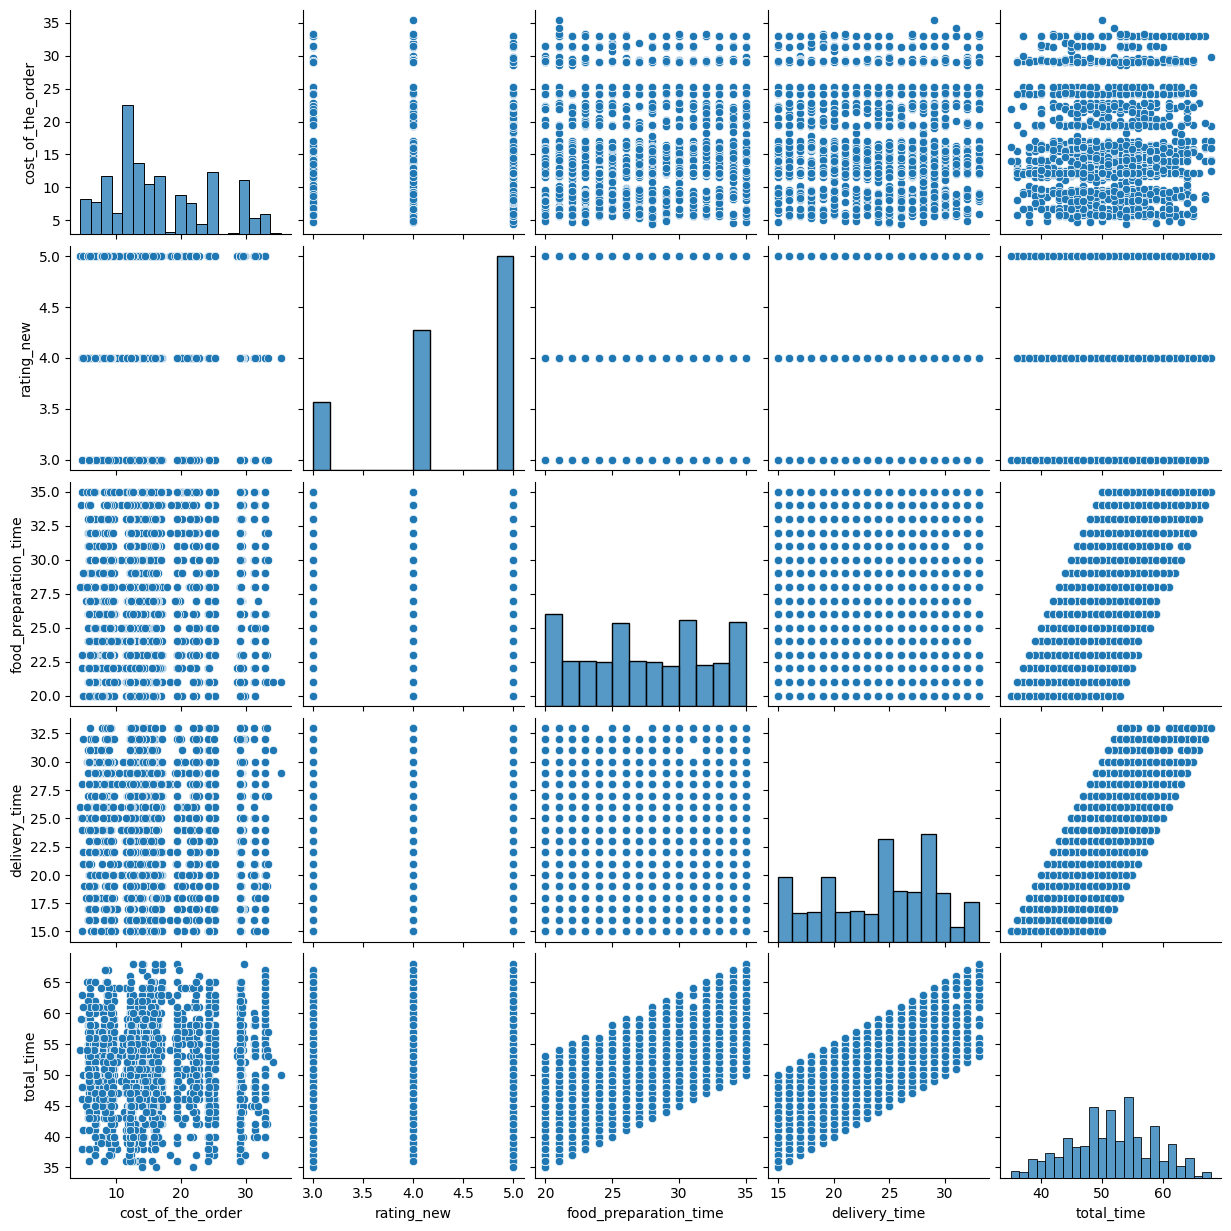

In [ ]:
#adding a pairplot to see at a glance if there are any correlations or interesting information
sns.pairplot(data=df[['cost_of_the_order','rating_new','food_preparation_time','delivery_time','total_time']])

No clear correlations between relevant data

<ipython-input-36-fc5ca479ea29>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


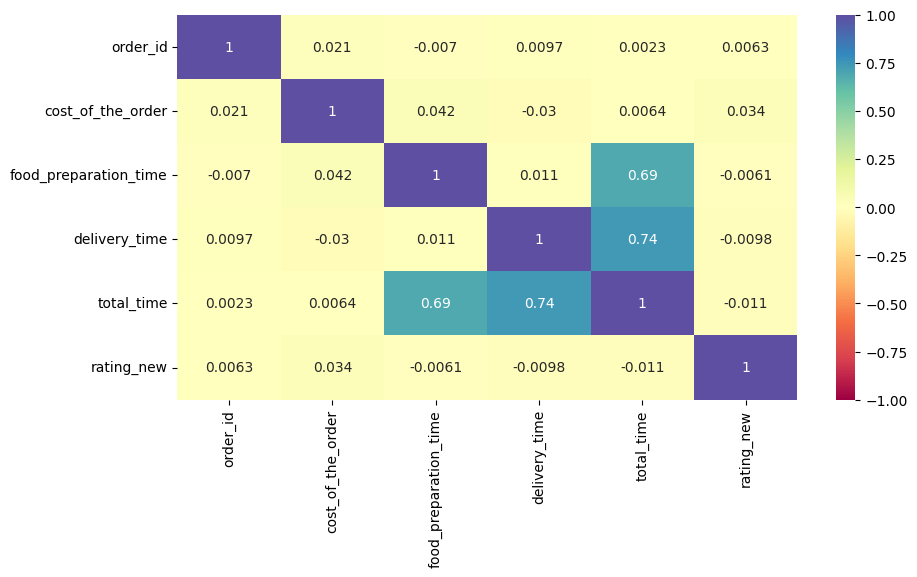

In [ ]:
#adding a heat map to see if there are any correlations
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

No clear correlations between relevant data

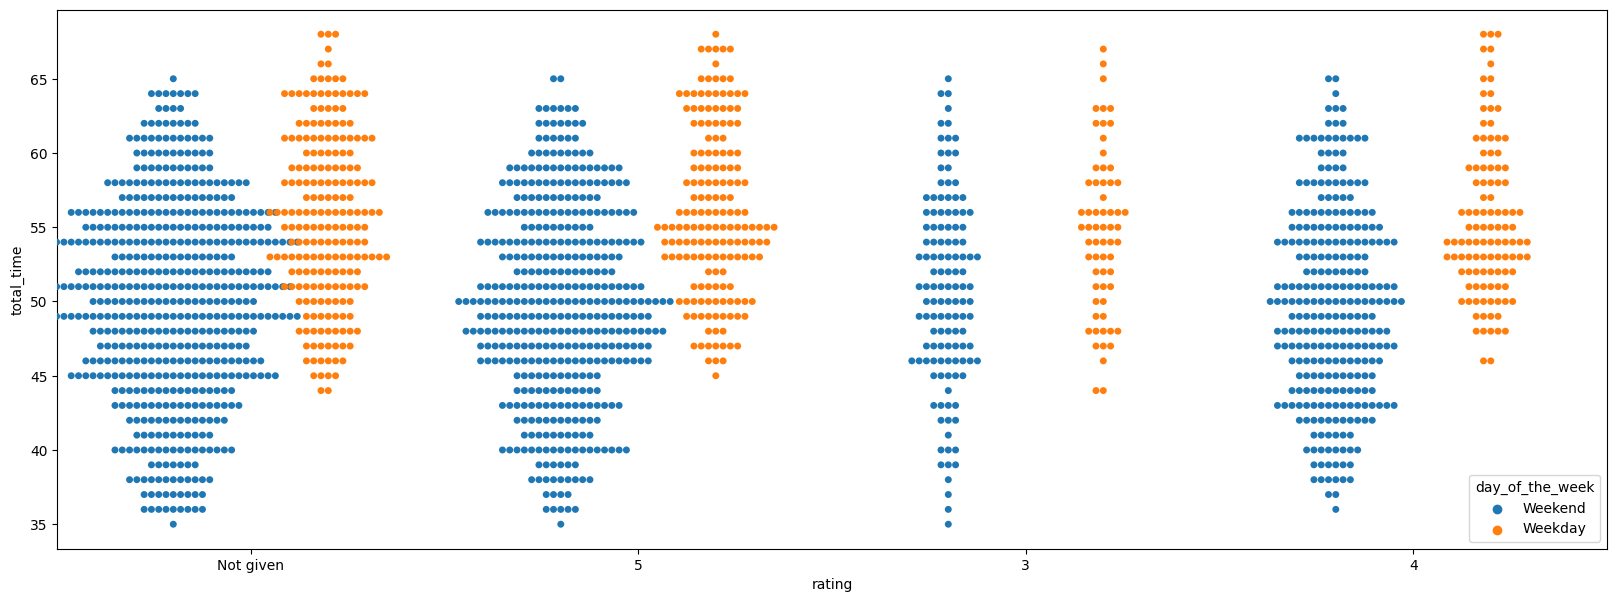

In [ ]:
#visualizing total time Vs ratings separated by day of the week
plt.figure(figsize=(20,7))
sns.swarmplot(data=df, x='rating', y='total_time', hue='day_of_the_week', dodge=True);

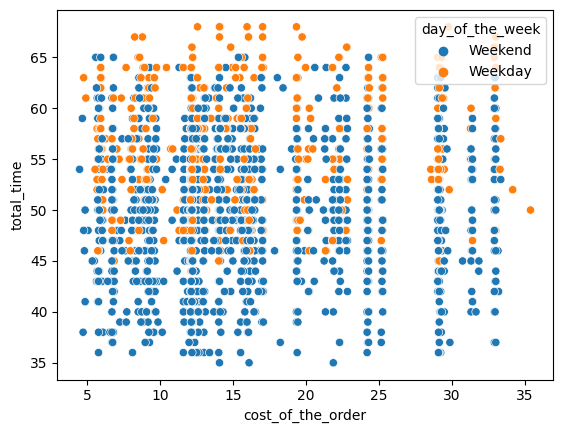

In [ ]:
sns.scatterplot(data=df, x='cost_of_the_order', y='total_time', hue='day_of_the_week');

Orders in general take longer during the week than over the weekends.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

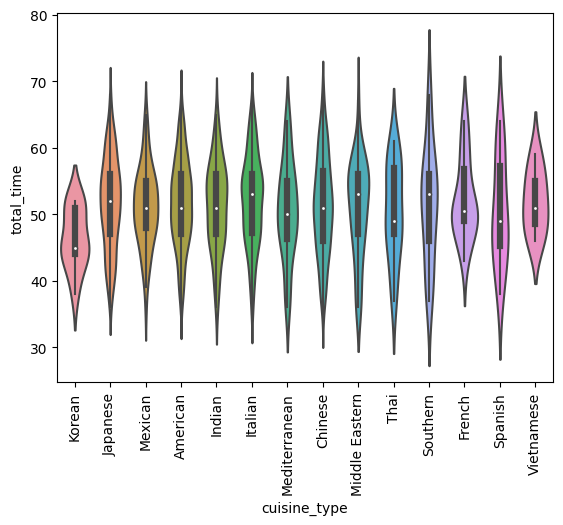

In [ ]:
sns.violinplot(data=df, x='cuisine_type', y='total_time')
plt.xticks(rotation=(90))

In [ ]:
rat_count = df.groupby("restaurant_name")["rating_new"].count()
rat_list=rat_count[rat_count].index.tolist()

print(rat_count)

restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Alidoro              0
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: rating_new, Length: 178, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


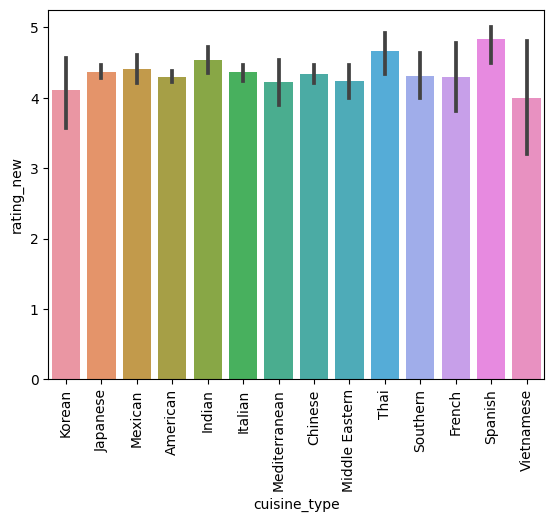

In [ ]:
plt.xticks(rotation=90)
sns.barplot(x="cuisine_type", y="rating_new", data=df)
plt.show()

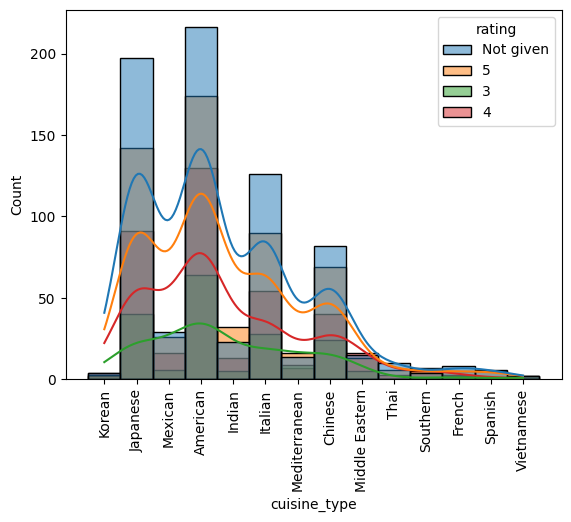

In [ ]:
plt.xticks(rotation=90)
sns.histplot(df, x="cuisine_type", hue="rating", kde=True)
plt.show()

There is a lot of customers that are not rating the service.

In [ ]:
#grouping to see the retirning rate of the customers
order_counts_per_customer = df.groupby('customer_id')['order_id'].nunique()
result_df = pd.DataFrame({'customer_id': order_counts_per_customer.index, 'order_count': order_counts_per_customer.values})

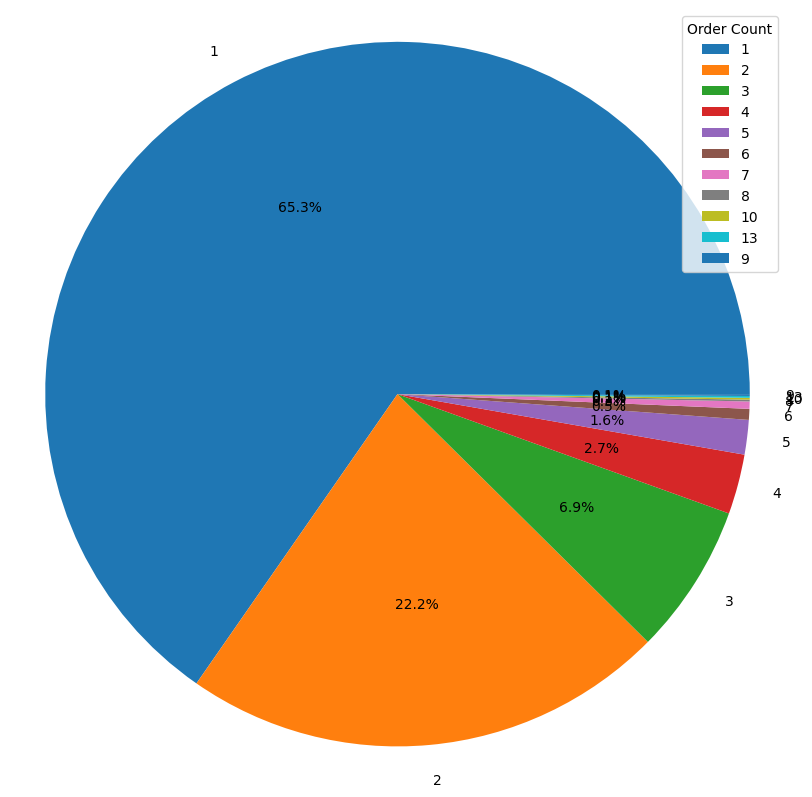

In [ ]:
order_count_pie = result_df['order_count'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(order_count_pie, labels=order_count_pie.index, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.legend(title='Order Count', loc='upper right')
plt.show()

There are very few returning customers.

<Axes: xlabel='order_count', ylabel='count'>

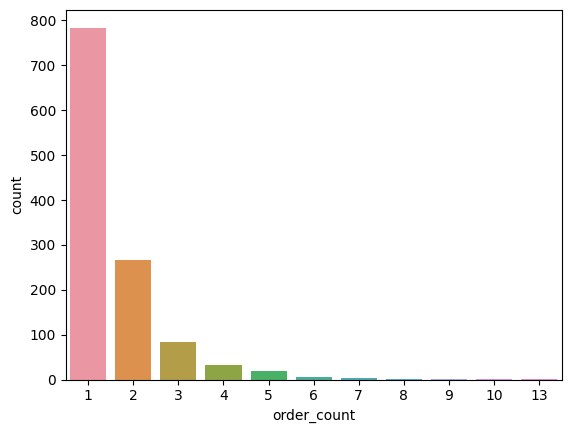

In [ ]:
sns.countplot(result_df, x="order_count")

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# adding a new column to convert the ratings to floats and change the "Not given" to NaN for ease of analysis
df["rating_new"]=df["rating"].copy()
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_bins,total_time,rating_new
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,More than 20 dollars,45,Not given
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,Less than or equeal to 20 dollars,48,Not given
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Less than or equeal to 20 dollars,51,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,More than 20 dollars,40,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Less than or equeal to 20 dollars,49,4


In [ ]:
df['rating_new'] = df['rating_new'].replace(['Not given'],np.nan)

df['rating_new'] = df['rating_new'].astype(float)

In [ ]:
# goruping rating per restaurant to the ones that have more than 50 ratings

rpr = df.groupby('restaurant_name')['rating_new'].count()>50

rpr50=rpr[rpr].index.tolist()

print(rpr50)

['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


In [ ]:
# grouping the mean of the restaurant ratigns to more than 4

ave_rpr = df.groupby("restaurant_name")["rating_new"].mean()>4

mt4_ave = ave_rpr[ave_rpr].index.tolist()

print(mt4_ave)

["'wichcraft", '12 Chairs', '67 Burger', 'Amma', 'Anjappar Chettinad', 'Asuka Sushi', 'Balade', 'Balthazar Boulangerie', 'Barbounia', 'Bareburger', 'Benihana', 'Bhatti Indian Grill', "Big Daddy's", 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Blue Ribbon Sushi Bar & Grill', 'Blue Ribbon Sushi Izakaya', 'Boqueria', "Bubby's ", 'Bukhara Grill', 'Burger Joint', 'Cafe Habana', 'Cafe Mogador', 'Cafe de La Esquina', "Carmine's", 'Chipotle Mexican Grill $1.99 Delivery', 'Cho Dang Gol', 'Chola Eclectic Indian Cuisine', 'Chote Nawab', 'Cipriani Le Specialita', 'Delicatessen', 'DespaÌ±a', "Dickson's Farmstand Meats", 'Dig Inn Seasonal Market', 'Donburi-ya', 'Dos Caminos', 'Dos Caminos Soho', 'El Parador Cafe', 'Empanada Mama (closed)', 'Five Guys Burgers and Fries', 'Five Leaves', 'Galli Restaurant', 'Grand Sichuan International', 'Han Dynasty', 'Haru Gramercy Park', 'Hill Country Fried Chicken', 'Hot Kitchen', 'Hummus Place', 'Hunan Manor', 'J. G. Melon', "Jack's Wife Freda", 'Junoon', 'K

In [ ]:
filter_df= df[df["restaurant_name"].isin(rpr50)]
ave_rating= filter_df.groupby('restaurant_name')['rating_new'].mean()

print(ave_rating)

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating_new, dtype: float64


#### Observations:
The restaurants that have rating counts of more than 50 with a mean greater than 4 that will get the promotional offer in the advertisement are:


*   Blue Ribbon Fried Chicken witn an average rating of 4.32 and
*   Blue Ribbon Sushi witn an average rating of 4.22
*   Shake Shack witn an average rating of 4.28
*   The Meatball Shop witn an average rating of 4.51






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#adding the revenue per order

def revenue(cost):
  if cost >20:
    return cost * 0.25
  elif 5 < cost <= 20:
    return cost * 0.15
  else:
    return 0

df["tot_revenue"] = df["cost_of_the_order"].apply(revenue)

df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_bins,total_time,rating_new,tot_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,More than 20 dollars,45,NaN,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,Less than or equeal to 20 dollars,48,NaN,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Less than or equeal to 20 dollars,51,5.0,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,More than 20 dollars,40,3.0,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Less than or equeal to 20 dollars,49,4.0,1.7385


In [ ]:

print("The net revenue generated across all orders over 5 dollars is ")
df["tot_revenue"].sum()


The net revenue generated across all orders over 5 dollars is 


6166.303

In [ ]:
#deterninig if htere are orders with no revenue
df[df["tot_revenue"]==0].count()

order_id                 9
customer_id              9
restaurant_name          9
cuisine_type             9
cost_of_the_order        9
day_of_the_week          9
rating                   9
food_preparation_time    9
delivery_time            9
cost_bins                9
total_time               9
rating_new               7
tot_revenue              9
dtype: int64

#### Observations:
The net revenue generated across all orders over 5 dollars is $6,166.303.


There are 9 orders that did not generate any revenue since they are under 5 dollars and there is no charges attached to these orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df['total_time'] = df['total_time'].astype(float)

In [ ]:
# determinig orders over 60 minutes
oo60 = df[df["total_time"]>60].count()

print("The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is:")
print(oo60/df.shape[0])


The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is:
order_id                 0.105374
customer_id              0.105374
restaurant_name          0.105374
cuisine_type             0.105374
cost_of_the_order        0.105374
day_of_the_week          0.105374
rating                   0.105374
food_preparation_time    0.105374
delivery_time            0.105374
cost_bins                0.105374
total_time               0.105374
rating_new               0.062698
tot_revenue              0.105374
dtype: float64


#### Observations:
The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
del_ave = df.groupby('day_of_the_week')['delivery_time'].mean()

print(del_ave)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


In [ ]:
print(28.340037-22.470022)

5.870014999999999


#### Observations:
The variation of the average delivery time between weekdays and weekends is of 5 minutes and 87 seconnds. Being delivery times faster during the weekend at an average of 22.47 minutes over the weekday average of 28.34 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*   There are no strong correlations - positive or negative - between any of the variables in the data.
*   38.78% of the customers did not leave a rating for their order, while 30.98% left a rating of 5, 20.34% left a rating of 4, 9.9%left a rating of 3, and no ratings of 2 or 1.
*   65.3% of the customers did not used FoodHub's service again, 22.2% used it twise. FoodHub only has 12.5% of returning customers.
*   The most popular cuisines are Amrican, Japanese, Italian and Chinese, both on the weekends aswell as during the weekdays.





### Recommendations:


*  Further Develop the Rewards Programs: Deliberate efforts are underway to introduce targeted rewards programs, featuring a 20% voucher for the top three users. FoodHub needs to continue to strategically develop these programs to foster repeat business, addressing the fact that 87.5% of our customers have engaged with the service only once or twice.

*   Feedback Consistency Enhancement: Recognizing the pivotal role of feedback in refining FoodHub services, there is a pressing need for enhanced consistency, both in terms of quantity and quality. FoodHub needs to incentivize customers to provide comprehensive feedback by offering rewards for ratings accompanied by comments. This approach not only ensures a steady influx of qualitative data but also facilitates a more nuanced analysis alongside quantitative metrics.

*   Revenue Model Analysis: The current revenue model reveals a notable fallacy. While FoodHub charges restaurants 25% on orders exceeding 20 dollars and 15% on orders surpassing 5 dollars, there is an evident gap for orders below 5 dollars. Currently, there are nine orders for which the company has not applied a surcharge, necessitating a reevaluation of FoodHub's pricing strategy for orders falling below 5 dollars.


---